In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('ggplot')

In [49]:
df = pd.read_csv("data/Mall_Customers.csv")

## Exploring dataset

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [52]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': "Spending_Score"}, inplace=True)

In [ ]:
# won't need this column for our analysis
df.drop(columns=['CustomerID'], inplace=True)

### Visualizing the correlations between features

We will realize there's not much correlation between the features

In [54]:
df_corr = df[['Age', 'Annual_Income', 'Spending_Score']].corr()

<Axes: >

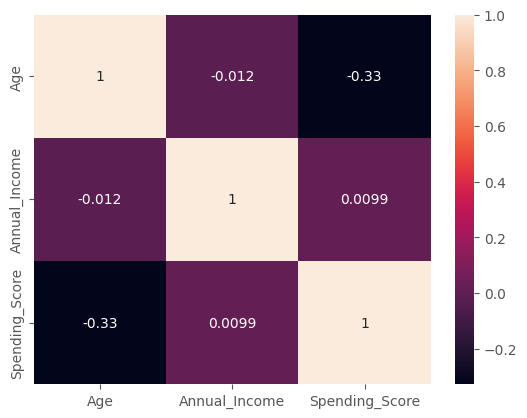

In [55]:
sns.heatmap(data=df_corr, annot=True)

### What features can we use to cluster customers?

C:\Users\saifa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


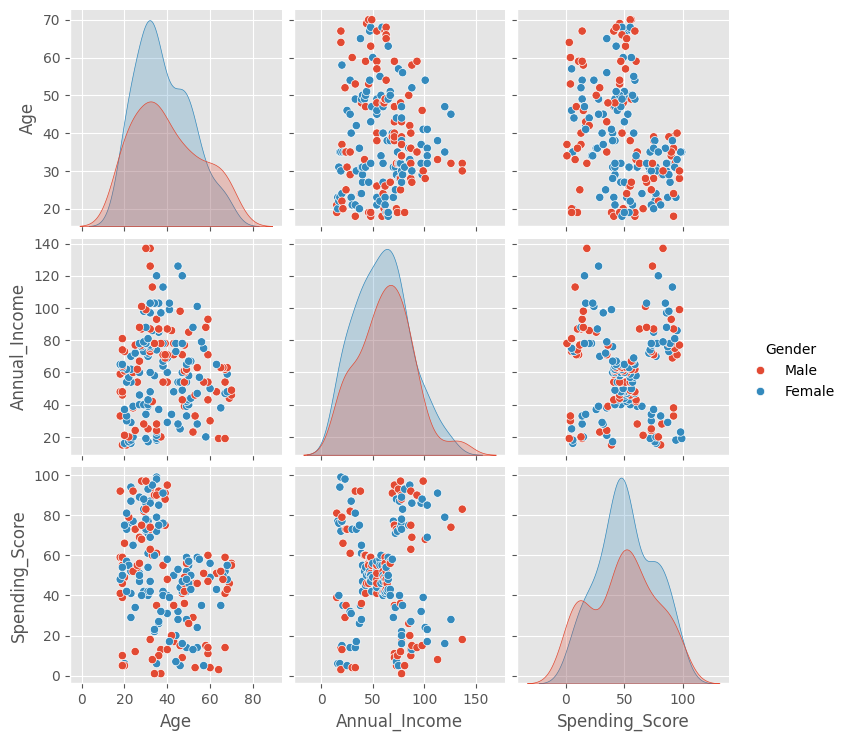

In [56]:
sns.pairplot(df, hue='Gender')

Features that show some potential for showing clusters of customers:
- Annual_Income and Spending_Score
- Age and Spending_Score

### Finding the most optimum number of clusters for each pair (elbow plot)

In [130]:
def optimalCluster(data, maxK):
    means = []
    inertias = []
    for i in range(1,maxK):
        kmeans = KMeans(n_clusters=i, n_init=10)
        kmeans.fit(data)
        means.append(i)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(means,inertias)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")


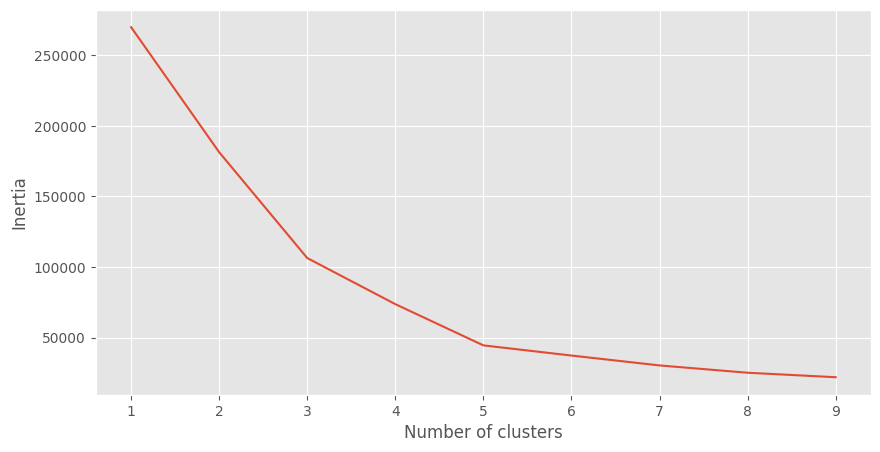

In [131]:
# we can see that 5 clusters would be good
optimalCluster(df[['Annual_Income', 'Spending_Score']], 10)

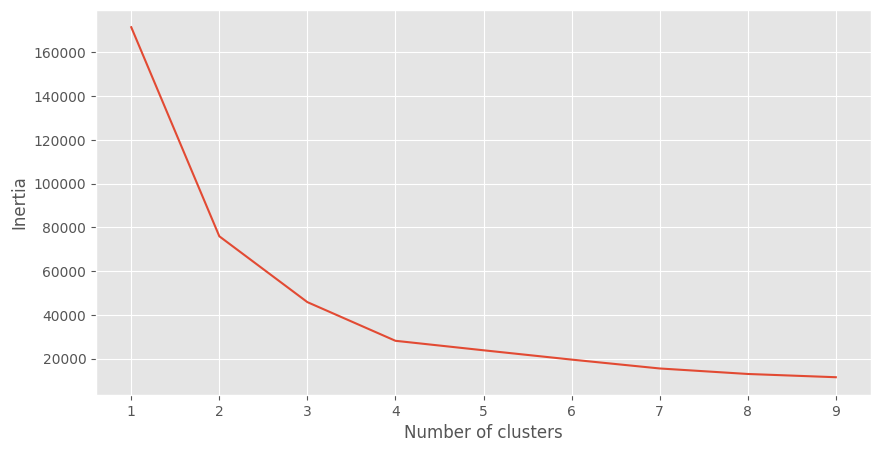

In [132]:
# we can see that 2 or 3 clusters could be good
optimalCluster(df[['Age', 'Spending_Score']], 10)

## Applying the KMeans clustering

#### We will use 5 clusters for the first pair

In [ ]:
kmeans_income_spending = KMeans(n_clusters = 5, n_init=10)
kmeans_income_spending.fit(df[['Annual_Income', 'Spending_Score']])

In [91]:
df['kmeans_income_spending_5'] = kmeans_income_spending.labels_

#### For the second pair we will try both 2 and 3

In [123]:
kmeans_age_spending_3 = KMeans(n_clusters = 3, n_init=10)
kmeans_age_spending_3.fit(df[['Age', 'Spending_Score']])

KMeans(n_clusters=3, n_init=10)

In [124]:
kmeans_age_spending_2 = KMeans(n_clusters = 2, n_init=10)
kmeans_age_spending_2.fit(df[['Age', 'Spending_Score']])

KMeans(n_clusters=2, n_init=10)

In [125]:
df['kmeans_age_spending_3'] = kmeans_age_spending_3.labels_

In [126]:
df['kmeans_age_spending_2'] = kmeans_age_spending_2.labels_

## Visualizing the clusters

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

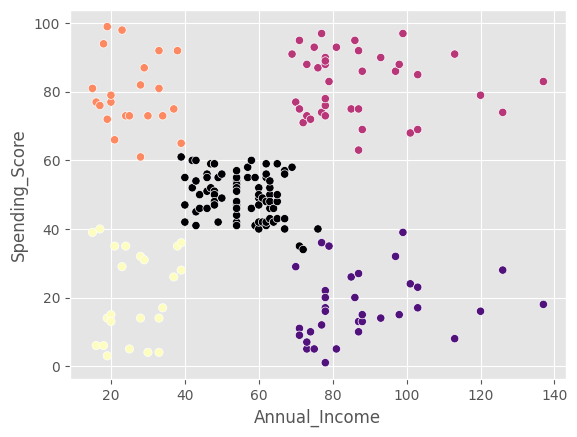

In [127]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='kmeans_income_spending_5', legend=False, palette='magma')

<Axes: xlabel='Age', ylabel='Spending_Score'>

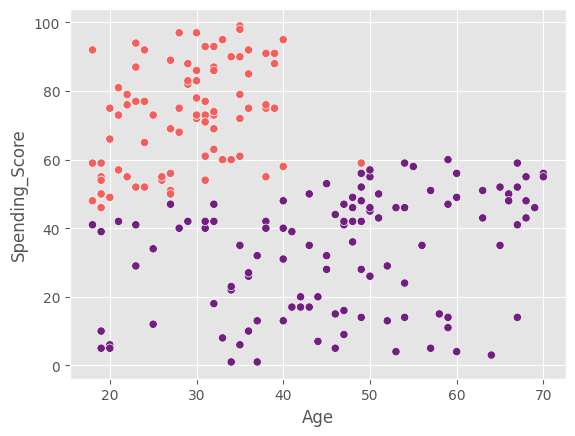

In [129]:
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='kmeans_age_spending_2', legend=False, palette='magma')

<Axes: xlabel='Age', ylabel='Spending_Score'>

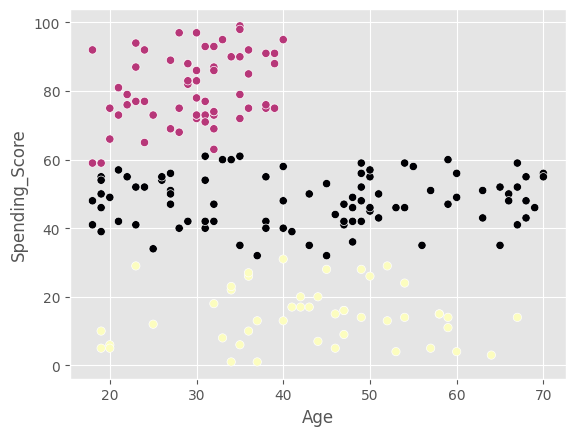

In [128]:
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='kmeans_age_spending_3', legend=False, palette='magma')

We can deduce that 2 clusters makes more sense for the current state of our data.